# Exercise 4.10 Final Task - Part 1

## Table of Contents:

#### 01. Importing libraries
#### 02. Task 4.10 Work
#### 03. Crosstab Work

### 01. Importing Libraries and Data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Data

path = r'C:\Users\Rebecca\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\Rebecca\\Instacart Basket Analysis'

In [4]:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_cust_merge.pkl'))

### 02. Task 4.10 Work

In [45]:
ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   _merge                         category
 10  product_name                   object  
 11  aisle_id                       int8    
 12  department_id                  int8    
 13  prices                         float32 
 14  source                         category
 15  price_range_loc                object  
 16  busiest_day                    object  
 17  busiest_days_breakdown   

 #### - Question 2: Address any PII security implications

In [46]:
# Dropping PII columns of first name and last name

ords_prods_cust_merge.drop(columns = ['first_name', 'last_name'], inplace = True)

In [47]:
# Verifying dropped PII columns

ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   _merge                         category
 10  product_name                   object  
 11  aisle_id                       int8    
 12  department_id                  int8    
 13  prices                         float32 
 14  source                         category
 15  price_range_loc                object  
 16  busiest_day                    object  
 17  busiest_days_breakdown   

#### - Question 3: Create Regions

Answer to question 3a:

In [48]:
# Verifying values in the state column to properly build the function

ords_prods_cust_merge['state'].value_counts(dropna = False)

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [49]:
# Creating the region_breakdown labels

def region_breakdown(row):

    if row['state'] in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        return 'Region 1'
    elif row['state'] in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        return 'Region 2'
    elif row['state'] in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Lousiana'):
        return 'Region 3'
    elif row['state'] in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        return 'Region 4'
    else: return 'Undetermined'

In [50]:
# Creating the region column

ords_prods_cust_merge['region'] = ords_prods_cust_merge.apply(region_breakdown, axis=1)

In [51]:
# Checking values in newly created region column 

ords_prods_cust_merge['region'].value_counts(dropna = False)

region
Region 3        10154403
Region 4         8292913
Region 2         7597325
Region 1         5722736
Undetermined      637482
Name: count, dtype: int64

Answer to question 3b:

In [78]:
ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'source', 'price_range_loc', 'busiest_day',
       'busiest_days_breakdown', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend_price', 'spender_type',
       'average_days_since_last_order', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'dependants', 'family_status', 'income',
       'True', 'region', 'exclude_label_loc'],
      dtype='object')

In [52]:
ords_prods_cust_merge['spender_type'].value_counts(dropna = False)

spender_type
Low spender     21760937
High spender    10643922
Name: count, dtype: int64

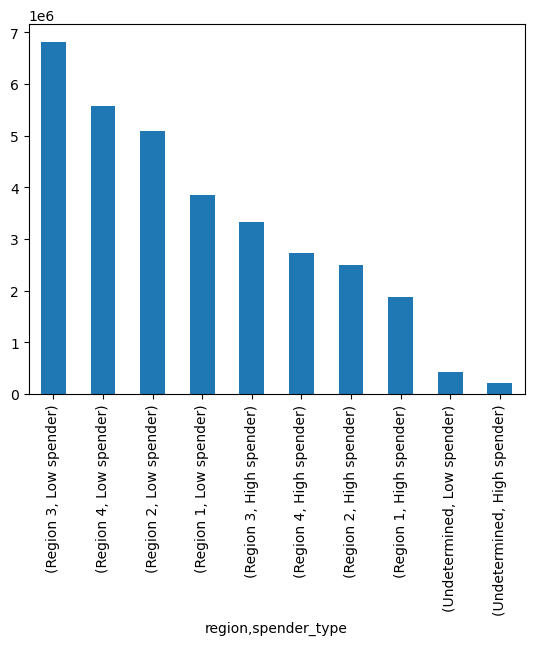

In [53]:
# Creating bar chart to see different in spending 

bar = ords_prods_cust_merge.value_counts(subset=['region', 'spender_type']).plot.bar()

In [54]:
# Exporting chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regions_spender_final.png'))

#### - Question 4: Exclusion flag for low-activity customers

In [55]:
# Creating exclusion flag

def exclude_label(row):
    if row['max_order'] < 5:
        return 'Exclude'
    else: return 'Include'

In [56]:
# Applying the function

ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] < 5, 'exclude_label_loc'] = 'Exclude'

In [57]:
ords_prods_cust_merge['exclude_label_loc'].value_counts(dropna = False)

exclude_label_loc
NaN        30964564
Exclude     1440295
Name: count, dtype: int64

In [58]:
# Removing exclusions from df

ords_prods_cust_filtered = ords_prods_cust_merge[ords_prods_cust_merge['exclude_label_loc'] != 'Exclude'].copy()

In [59]:
# Creating new df to export

ords_prods_cust_excludes = ords_prods_cust_merge[ords_prods_cust_merge['exclude_label_loc'] == 'Exclude'].copy()

In [79]:
ords_prods_cust_excludes.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'source', 'price_range_loc', 'busiest_day',
       'busiest_days_breakdown', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend_price', 'spender_type',
       'average_days_since_last_order', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'dependants', 'family_status', 'income',
       'True', 'region', 'exclude_label_loc'],
      dtype='object')

In [60]:
# Exporting exclusions

ords_prods_cust_excludes.to_csv('excluded_customers.csv', index=False)

In [61]:
ords_prods_cust_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   _merge                         category
 10  product_name                   object  
 11  aisle_id                       int8    
 12  department_id                  int8    
 13  prices                         float32 
 14  source                         category
 15  price_range_loc                object  
 16  busiest_day                    object  
 17  busiest_days_breakdown        

#### - Question 5: Creating profile variables

In [62]:
# Creating subset 

df = ords_prods_cust_filtered[:1000000]

In [63]:
df.shape

(1000000, 35)

In [64]:
df.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,gender,state,age,date_joined,dependants,family_status,income,True,region,exclude_label_loc
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3,NaN
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3,NaN
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3,NaN
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3,NaN
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3,NaN


In [65]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'source', 'price_range_loc', 'busiest_day',
       'busiest_days_breakdown', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend_price', 'spender_type',
       'average_days_since_last_order', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'dependants', 'family_status', 'income',
       'True', 'region', 'exclude_label_loc'],
      dtype='object')

In [66]:
# Importing department file

df_dep = pd.read_csv(r'C:\Users\Rebecca\Instacart Basket Analysis\02 Data\Original Data\departments.csv', index_col = False)

In [67]:
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [68]:
# Transposing df_dep

df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [104]:
# Define a function for different customer types

def customer_type(row):

  if (row['age'] >= 20) and (row['dependants'] == 0) and (row['income'] < 100000):
    return 'Single Adult'
  elif (row['age'] >= 20) and (row['department_id'] == 8):
    return 'Pet Shopper'
  elif (row['orders_day_of_week'] == 0) or (row['orders_day_of_week'] == 6):
    return 'Weekend Shopper'
  elif (row['order_hour_of_day'] >= 6) and (row['order_hour_of_day'] <= 11):
    return 'Morning Shopper'
  else: return 'Other Shopper'

In [105]:
# Applying the function

df['shopper_type'] = df.apply(customer_type, axis=1)

C:\Users\Rebecca\AppData\Local\Temp\ipykernel_28344\4204533260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shopper_type'] = df.apply(customer_type, axis=1)


In [106]:
# Verifying counts

df['shopper_type'].value_counts(dropna = False)

shopper_type
Other Shopper      383047
Weekend Shopper    288684
Morning Shopper    208185
Single Adult       117010
Pet Shopper          3074
Name: count, dtype: int64

#### - Question 6: Show distribution of profiles

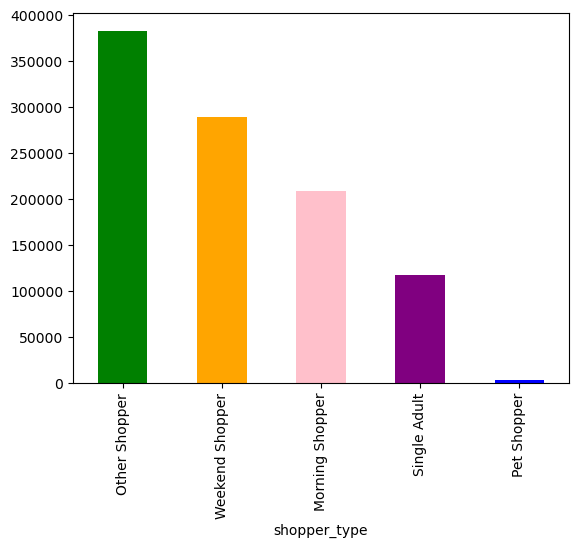

In [107]:
# Creating bar chart

bar2 = df['shopper_type'].value_counts().plot.bar(color=['green','orange', 'pink', 'purple', 'blue'])

In [108]:
# Exporting bar chart

bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_shopper_type.png'))

#### - Question 7: Max, Mean, and Min variables

In [109]:
# Runnig max, mean, and min on frequency

df.groupby('shopper_type').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
shopper_type                                     
Morning Shopper              10.242305  0.0  30.0
Other Shopper                10.658407  0.0  30.0
Pet Shopper                  10.917715  0.0  30.0
Single Adult                 10.967281  0.0  30.0
Weekend Shopper              11.228407  0.0  30.0

In [110]:
# Runnig max, mean, and min on expenditure

df.groupby('shopper_type').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                      mean min max
shopper_type                      
Morning Shopper  39.569594   5  99
Other Shopper    34.595060   5  99
Pet Shopper      35.283019   5  99
Single Adult     34.619973   5  99
Weekend Shopper  32.161623   5  99

#### - Question 8: Compare profiles

In [111]:
# Comparing shoppers and regions

df.groupby(['shopper_type', 'region']).size().unstack().fillna(0)

region,Region 1,Region 2,Region 3,Region 4,Undetermined
shopper_type,,,,,
Morning Shopper,35379,46070,63051,57983,5702
Other Shopper,66942,88305,116485,102791,8524
Pet Shopper,874,896,711,557,36
Single Adult,24738,29173,33442,28955,702
Weekend Shopper,52913,64507,89164,75180,6920


Review of shoppers and regions (not considering other shopper category or the Undetermined region)

All regions' highest shopper is the weekend shopper (other than the "Other Shopper" category, which means additional categories should be created to properly analyze the type of shopper). 

The largest segment of "Other Shopper" is within Region 4.

Shoppers only shopping for pet products have the lowest quantity and most pet shoppers are in Region 2.

In [114]:
# Comparing shoppers and departments

df.groupby(['department_id', 'shopper_type']).size().unstack().fillna(0)

shopper_type,Morning Shopper,Other Shopper,Pet Shopper,Single Adult,Weekend Shopper
department_id,,,,,
1,12051.0,26997.0,0.0,7540.0,20920.0
2,219.0,422.0,0.0,132.0,319.0
3,8108.0,14060.0,0.0,4491.0,10331.0
4,58224.0,109746.0,0.0,32161.0,87449.0
5,1072.0,2153.0,0.0,515.0,853.0
6,1522.0,3114.0,0.0,930.0,2604.0
7,19085.0,33302.0,0.0,10869.0,21724.0
8,10.0,23.0,3074.0,339.0,25.0
9,4717.0,9784.0,0.0,3044.0,8126.0


Review of shoppers and department_id (not considering other shopper category)

All shoppers pick up the most products from department_id 4, which is produce. 

The "Morning Shopper" and the "Single Adult" Shopper both have the same high department_ids: 16 (dairy eggs), 7 (beverages), 19 (snacks).

The "Weekend Shopper's" most purchased products come from department_ids: 1 (frozen), 7 (beverages), and 19 (snacks).

#### - Question 9: Visualizations

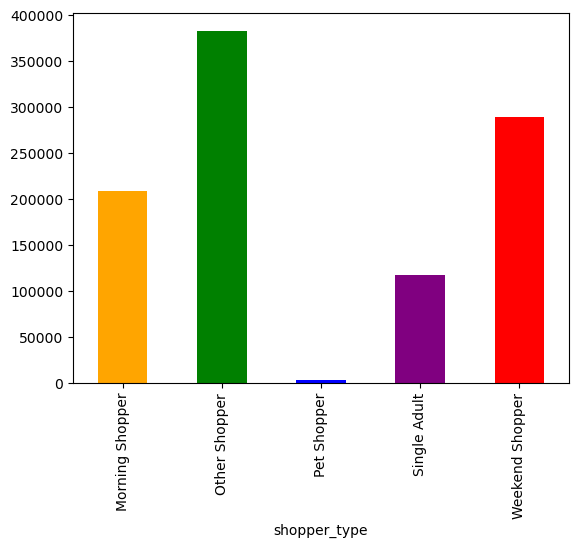

In [126]:
# Creating bar chart for shoppers and departments

bar3 = df.groupby('shopper_type')['department_id'].count().plot.bar(color=['orange','green', 'blue', 'purple', 'red'])

In [127]:
# Exporting bar chart

bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_shopper_department.png'))

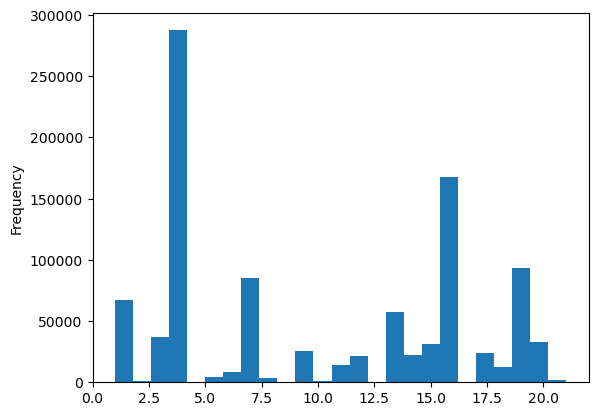

In [130]:
# Creating histogram to show frequency of department id

hist = df['department_id'].plot.hist(bins=25)

In [131]:
# Exporting histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_department_id.png'))

#### - Exporting final data set

In [132]:
ords_prods_cust_filtered.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'source', 'price_range_loc', 'busiest_day',
       'busiest_days_breakdown', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend_price', 'spender_type',
       'average_days_since_last_order', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'dependants', 'family_status', 'income',
       'True', 'region', 'exclude_label_loc'],
      dtype='object')

In [133]:
ords_prods_cust_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   _merge                         category
 10  product_name                   object  
 11  aisle_id                       int8    
 12  department_id                  int8    
 13  prices                         float32 
 14  source                         category
 15  price_range_loc                object  
 16  busiest_day                    object  
 17  busiest_days_breakdown        

In [134]:
# Exporting data set

ords_prods_cust_filtered.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_filtered.pkl'))

## 03. Crosstab Work

In [5]:
ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   _merge                         category
 10  product_name                   object  
 11  aisle_id                       int8    
 12  department_id                  int8    
 13  prices                         float32 
 14  source                         category
 15  price_range_loc                object  
 16  busiest_day                    object  
 17  busiest_days_breakdown   

In [6]:
# Changing days_since_prior_order from float16 to float32

ords_prods_cust_merge['days_since_prior_order']=ords_prods_cust_merge['days_since_prior_order'].astype('float32')

In [7]:
# Verifying update

ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float32 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   _merge                         category
 10  product_name                   object  
 11  aisle_id                       int8    
 12  department_id                  int8    
 13  prices                         float32 
 14  source                         category
 15  price_range_loc                object  
 16  busiest_day                    object  
 17  busiest_days_breakdown   

In [8]:
# Performing crosstab

crosstab = pd.crosstab(ords_prods_cust_merge['days_since_prior_order'], ords_prods_cust_merge['order_number'], dropna = False)

In [9]:
crosstab.to_clipboard()